<a href="https://colab.research.google.com/github/AlphaKermit-999/AI-Topics-learnings/blob/main/Advanced_AI/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
from keras import datasets

In [56]:
dir(datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'boston_housing',
 'california_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

In [57]:
(xtrain, ytrain), (xtest, ytest) = datasets.fashion_mnist.load_data()

In [58]:
xtrain.shape

(60000, 28, 28)

In [59]:
xtest.shape

(10000, 28, 28)

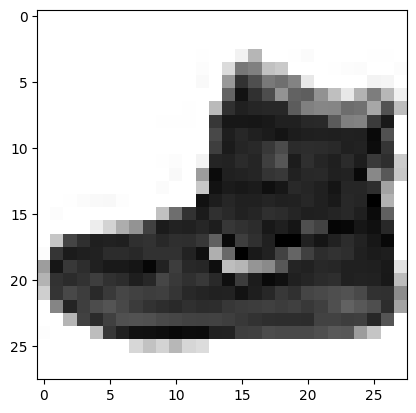

In [60]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0], cmap='binary')

In [61]:
xtrain.shape

(60000, 28, 28)

In [62]:
import numpy as np

xtrain = xtrain.reshape(xtrain.shape[0], np.prod(xtrain.shape[1:]))


In [63]:
xtest = xtest.reshape(xtest.shape[0], np.prod(xtest.shape[1:]))
xtest.shape

(10000, 784)

In [64]:
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [65]:
from tensorflow.keras.utils import to_categorical


In [66]:
ytrain1 = to_categorical(ytrain)
ytest1 = to_categorical(ytest)

In [67]:
ytrain[0]

np.uint8(9)

In [68]:
ytrain1[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [69]:
xtrain = xtrain/255
xtest = xtest/255

In [70]:
xtrain[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [71]:
xtrain.shape

(60000, 784)

In [72]:
ytrain1.shape

(60000, 10)

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [74]:
model = Sequential([Dense(500, activation="relu", input_dim=784),
            Dense(430, activation="relu"),
            Dense(300, activation="relu"),
            Dense(200, activation="relu"),
            Dense(100, activation="relu", name="fc4"),
            Dense(10, activation="softmax")])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 430)            │       215,430 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 300)            │       129,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc4 (Dense)                     │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 818,540 (3.12 MB)

 Trainable params: 818,540 (3.12 MB)

 Non-trainable params: 0 (0.00 B)

In [76]:
import tensorflow as tf

In [77]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [78]:
h2 = model.fit(xtrain, ytrain1, epochs=10, validation_data=(xtest, ytest1), batch_size=150)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7520 - loss: 0.6977 - val_accuracy: 0.8514 - val_loss: 0.4048
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8611 - loss: 0.3735 - val_accuracy: 0.8643 - val_loss: 0.3849
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8779 - loss: 0.3296 - val_accuracy: 0.8738 - val_loss: 0.3605
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8887 - loss: 0.2993 - val_accuracy: 0.8769 - val_loss: 0.3406
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8958 - loss: 0.2817 - val_accuracy: 0.8779 - val_loss: 0.3490
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8980 - loss: 0.2688 - val_accuracy: 0.8781 - val_loss: 0.3402
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9053 - loss: 0.2530 - val_accuracy: 0.8716 - val_loss: 0.3598
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9076 - loss: 0.2429 - val_accu

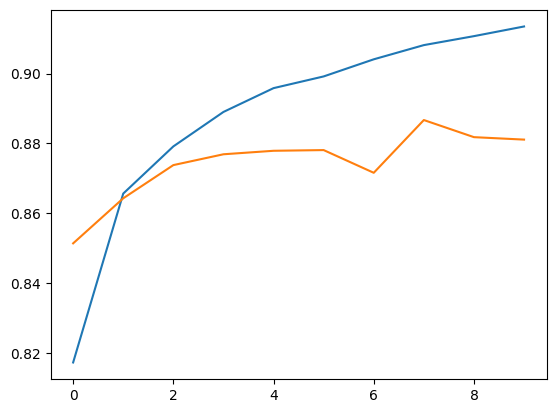

In [79]:
plt.plot(h2.history["accuracy"])
plt.plot(h2.history["val_accuracy"])

In [80]:
model.evaluate(xtest, ytest1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8794 - loss: 0.3603


[0.35601118206977844, 0.8810999989509583]

In [81]:
ypred = np.argmax(model.predict(xtest), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [82]:
ytest

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [83]:
ypred

array([9, 2, 1, ..., 8, 1, 5])

In [84]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(ytest, ypred)

0.8811

<Axes: >

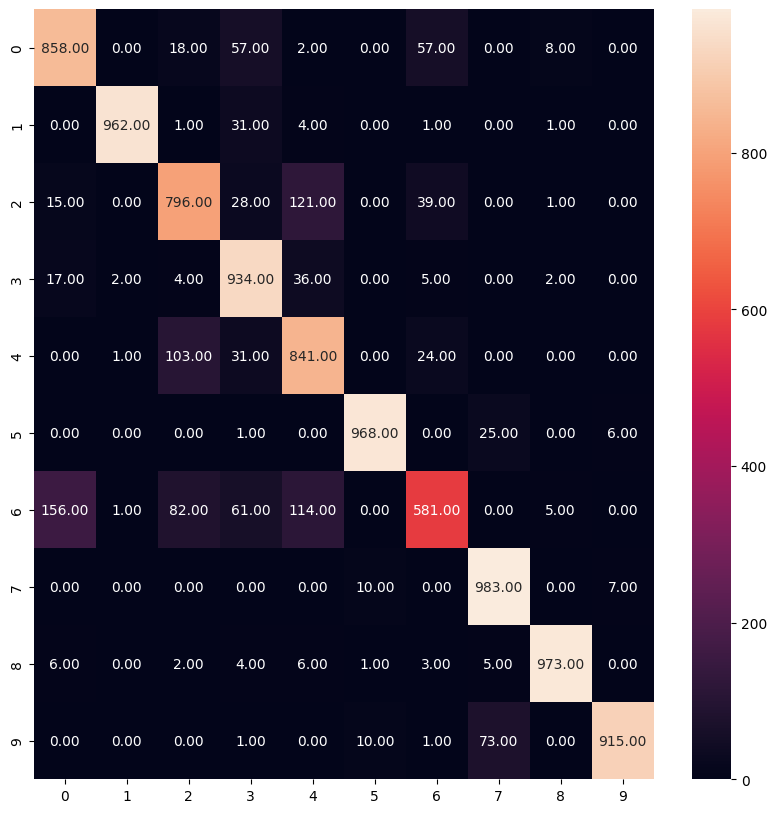

In [85]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(ytest, ypred), annot=True, fmt="0.2f")

# Hyper Parameter Tuning

In [88]:
!pip install scikeras

In [89]:
def model11(optimizer = "adam", neuron = 150):
  model = Sequential([Dense(neuron, activation="relu", input_dim=784),
            Dense(430, activation="relu"),
            Dense(300, activation="relu"),
            Dense(200, activation="relu"),
            Dense(100, activation="relu", name="fc4"),
            Dense(10, activation="softmax")])
  model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
  return model

*Grid Search CV vs Random Search CV*

In [90]:
p1 = {"optimizer": ["adam", "rmsprop", "sgd"],
      "neuron": [150, 200, 250, 100],
      "epochs": [10, 15, 5],
      "batch_size": [32, 50, 100]
      }

In [91]:
import tensorflow
tensorflow.__version__

'2.19.0'

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
from scikeras.wrappers import KerasClassifier, KerasRegressor

In [95]:
cl = KerasClassifier(model = model11)

In [96]:
grid = GridSearchCV(cl, param_grid=p1, cv=3)
grid = grid.fit(xtrain, ytrain1)

AttributeError: 'super' object has no attribute '__sklearn_tags__'